<a href="https://colab.research.google.com/github/Aditipatel0811/NN-DL/blob/main/AditiPatel_204_nndl_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Regular lab Question – 3

Develop a neural network using backpropagation to classify images from the CIFAR-10
dataset. The dataset contains 60,000 32x32 color images divided into 10 classes
(airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks).

Data Preprocessing

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load the CIFAR-10 dataset.

In [4]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Perform necessary data preprocessing steps:
▪ Normalize pixel values to range between 0 and 1.
▪ Convert class labels into one-hot encoded format.
▪ Split the dataset into training and test sets (e.g., 50,000 images for
training and 10,000 for testing).
▪ Optionally, apply data augmentation techniques (such as random
flips, rotations, or shifts) to improve the generalization of the
model.

In [5]:
# Normalize pixel values to range between 0 and 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Convert class labels into one-hot encoded format
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Split the dataset: 50,000 for training and 10,000 for testing
# It is already splitted above

# Apply data augmentation techniques
data_augmentation = ImageDataGenerator(
    rotation_range=20,  # Randomly rotate images by 20 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally
    height_shift_range=0.2,  # Randomly shift images vertically
    horizontal_flip=True,  # Randomly flip images horizontally
)

print("Data preprocessing complete.")

Data preprocessing complete.


Network Architecture Design:

In [6]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

Design a feedforward neural network to classify the images.
▪ Input Layer: The input shape should match the 32x32x3
dimensions of the CIFAR-10 images.
▪ Hidden Layers: Use appropriate layers.
▪ Output Layer: The final layer should have 10 output neurons (one
for each class) with a softmax activation function for multi-class
classification.

In [7]:
# Design a feedforward neural network
model = Sequential()

# Input Layer: Flatten the 32x32x3 input images
model.add(Flatten(input_shape=(32, 32, 3)))

# Hidden Layers
model.add(Dense(512, activation='relu'))  # First hidden layer
model.add(Dropout(0.5))  # Dropout layer to prevent overfitting
model.add(Dense(256, activation='relu'))  # Second hidden layer
model.add(Dropout(0.5))  # Dropout layer to prevent overfitting

# Output Layer: 10 output neurons for each class
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

Input Layer:

Flatten Layer:
Reason: The CIFAR-10 images are 32x32 pixels with 3 color channels (RGB). Flattening transforms this 3D structure into a 1D array suitable for fully connected layers, enabling the model to process the pixel values effectively.

Hidden Layers:

First Hidden Layer (512 Neurons):

Type: Dense (Fully Connected)
Reason: The choice of 512 neurons allows the model to capture a rich set of features from the input images. This layer acts as the primary feature extractor, detecting complex patterns and representations from the flattened image data. A larger number of neurons enhances the model's capacity to learn intricate features from the dataset.
Dropout Layer (0.5):

Reason: Dropout is a regularization technique used to prevent overfitting by randomly setting a fraction of the neurons to zero during training. A dropout rate of 0.5 is commonly used, as it helps balance model complexity and generalization.
Second Hidden Layer (256 Neurons):

Type: Dense (Fully Connected)
Reason: A reduction in the number of neurons to 256 in the second hidden layer helps in compressing the feature representation learned in the previous layer. This layer allows the model to refine and abstract the features further, maintaining a balance between model complexity and the risk of overfitting.
Second Dropout Layer (0.5):

Reason: Similar to the first dropout layer, this dropout layer helps to enhance generalization by further preventing overfitting in the second hidden layer.

Output Layer:

Final Layer (10 Neurons, Softmax Activation):
Type: Dense (Fully Connected)
Reason: The output layer has 10 neurons corresponding to the 10 classes in the CIFAR-10 dataset. The softmax activation function is used to output a probability distribution over the classes, making it suitable for multi-class classification tasks. Each neuron outputs the probability that the input image belongs to a particular class.

Activation Functions:

Choose any two appropriate activation functions for the hidden layers
(e.g., ReLU, sigmoid, or tanh).

1) ReLU (Rectified Linear Unit):

Selection: The ReLU activation function is chosen for both hidden layers.
Formula:
f(x)=max(0,x)

2) Tanh (Hyperbolic Tangent):

Selection: Tanh activation function can be used as an alternative to ReLU, but in this specific architecture, it could be considered for experimental purposes in one of the layers.
Formula:

f(x)= (e^(x)-e^(-x)) / (e^(x)+e^(-x))


Explain why you selected a particular activation function and its role in
the backpropagation process.

Reasons for Selection in ReLU:-

1) Non-linearity: ReLU introduces non-linearity to the model, which is essential for learning complex patterns in the data. Without non-linear activation functions, the network would behave like a linear model, limiting its expressiveness.
2) Computational Efficiency: ReLU is computationally efficient because it involves simple thresholding at zero, allowing faster training compared to more complex activation functions like sigmoid or tanh.
3) Sparse Activation: ReLU activates only a subset of neurons at a time (those with positive inputs), leading to a more efficient representation of the data and reducing the likelihood of overfitting.

Role of ReLU in Back propagation

ReLU adds non-linear transformations to the network. This is critical because most real-world data is non-linear.
Gradient Composition for ReLU:- he gradient of ReLU is 1 for positive inputs and 0 for negative inputs. During backpropagation, if a neuron is inactive (output is 0), it does not contribute to the gradient flow, effectively preventing the weights from updating in that neuron. This sparsity can help reduce overfitting but can also lead to the "dying ReLU" problem, where neurons can become inactive and never activate during training.


Reasons for selection of Tanh

1) Zero-Centered Output: Tanh outputs values in the range of -1 to 1, which makes the outputs zero-centered. This property can help mitigate issues related to gradient saturation during training and improve convergence speed compared to the sigmoid function, which outputs between 0 and 1.
2) Gradient Flow: The gradients for the tanh function are relatively stronger than those for the sigmoid function when the inputs are in the steep regions, which can help propagate gradients better during backpropagation.

Role of Tanh in Back Propagation

Tanh adds non-linear transformations to the network. This is critical because most real-world data is non-linear.

Gradient Computation:
 The gradient of tanh is maximum at 0 and decreases towards -1 and 1. This ensures that the gradients remain well-scaled for inputs near zero, helping with efficient weight updates during training. However, tanh can suffer from saturation for extreme values, where gradients approach zero, leading to slower learning rates.

4. Loss Function and Optimizer:
o Use any two loss functions and compare with the categorical cross
entropy since this is a multi-class classification problem.



Two loss function that I have chosen are:-

1. Kullback-Leibler Divergence Loss (KL Divergence)
Definition: KL divergence measures how one probability distribution diverges from a second expected probability distribution. It can be used to compare the predicted probability distribution with the true distribution.

Why Use It: KL divergence is useful in scenarios where you want to measure how much information is lost when approximating one distribution with another. It provides a more generalized measure of the difference between distributions, which can be useful in probabilistic models.

2. Sparse Categorical Cross-Entropy Loss
Definition: Sparse categorical cross-entropy is similar to categorical cross-entropy but directly works with integer labels rather than requiring one-hot encoding.

Why Use It: This loss function is memory-efficient because it does not require the overhead of one-hot encoding, making it ideal for multi-class classification with many classes.

Comparing these loss functions with categorical cross-entropy:-

Summary of Loss Functions for Multi-Class Classification

Categorical Cross-Entropy Loss:
Pros:
Widely used and well-understood in the context of multi-class classification.
Effectively quantifies the performance of the model by comparing predicted probabilities to true class distributions.
Provides meaningful loss values, making it easy to interpret.
Cons:
Requires one-hot encoding of labels, which can increase memory usage, especially with a large number of classes.

Kullback-Leibler Divergence Loss (KL Divergence):
Pros:
Measures how one probability distribution diverges from another, allowing for a more generalized assessment of model performance.
Useful for probabilistic interpretations and applications in generative models.
Cons:
Less intuitive for standard classification tasks, making it potentially more complex to interpret compared to categorical cross-entropy.

Sparse Categorical Cross-Entropy Loss:
Pros:
More memory-efficient as it directly works with integer labels, eliminating the need for one-hot encoding.
Similar performance to categorical cross-entropy while saving computational resources.
Cons:
May be less intuitive than categorical cross-entropy for some implementations, especially for those unfamiliar with integer labels.

Select an appropriate optimizer (e.g., SGD, Adam, RMSprop) and explain
how the learning rate affects the backpropagation process.

Adam Optimizer:

Definition: Adam (Adaptive Moment Estimation) is an advanced gradient descent algorithm that combines the benefits of two other extensions of stochastic gradient descent: AdaGrad and RMSprop.
Benefits:
Adaptive Learning Rates: Adam computes adaptive learning rates for each parameter based on first and second moments of the gradients (the mean and the variance).
Efficiency: It requires minimal memory and is computationally efficient, making it suitable for large datasets and parameters.

Learning Rate: The learning rate is a hyperparameter that determines the step size at each iteration while moving toward a minimum of the loss function.

Effects on Backpropagation:

Too High: If the learning rate is too high, the model may overshoot the minimum of the loss function, causing oscillations and potentially leading to divergence (the model fails to learn).
Too Low: Conversely, if the learning rate is too low, convergence can be painfully slow, requiring many epochs to reach the minimum, and may get stuck in local minima.
Adaptive Learning Rates: Optimizers like Adam adjust the learning rate dynamically based on the gradients, allowing the model to converge faster and with more stability, thus improving the effectiveness of backpropagation.

How does the choice of optimizer and learning rate influence the
convergence of the network? How would you adjust the learning rate if the
model is not converging properly?

Optimizer Choice:

The optimizer determines how the model's weights are updated during training based on the gradients of the loss function. Different optimizers have distinct strategies for weight updates, which can significantly affect the convergence speed and stability of the model.Learning Rate:

The learning rate controls the step size during weight updates. It is a crucial hyperparameter that influences the convergence behavior of the model.

Too High: If the learning rate is too high, the updates may overshoot the optimal solution, causing the loss to oscillate or even diverge. This leads to failure in finding the minimum.
Too Low: Conversely, if the learning rate is too low, the convergence can be excessively slow, requiring many epochs to reach the minimum. The model may also get stuck in local minima, making it difficult to achieve better performance.

5. Training the Model:
o Implement backpropagation to update the weights and biases of the
network during training.
o Train the model for a fixed number of epochs (e.g., 50 epochs) and
monitor the training and validation accuracy.

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


781/781 ━━━━━━━━━━━━━━━━━━━━ 66s 82ms/step - accuracy: 0.1469 - loss: 2.3222 - val_accuracy: 0.2181 - val_loss: 2.1027
Epoch 2/10
  1/781 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.1562 - loss: 2.2274

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


781/781 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1562 - loss: 2.2274 - val_accuracy: 0.2217 - val_loss: 2.1042
Epoch 3/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 76s 77ms/step - accuracy: 0.1717 - loss: 2.1570 - val_accuracy: 0.2259 - val_loss: 2.0865
Epoch 4/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1719 - loss: 2.3382 - val_accuracy: 0.2353 - val_loss: 2.0864
Epoch 5/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 61s 77ms/step - accuracy: 0.1892 - loss: 2.1220 - val_accuracy: 0.2492 - val_loss: 2.0597
Epoch 6/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1875 - loss: 2.1854 - val_accuracy: 0.2498 - val_loss: 2.0605
Epoch 7/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 60s 77ms/step - accuracy: 0.1929 - loss: 2.1140 - val_accuracy: 0.2344 - val_loss: 2.0404
Epoch 8/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2344 - loss: 2.1095 - val_accuracy: 0.2340 - val_loss: 2.0355
Epoch 9/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 61s 77ms/step - accuracy: 0.1946 - loss: 2.1053 - val_accuracy: 0.249

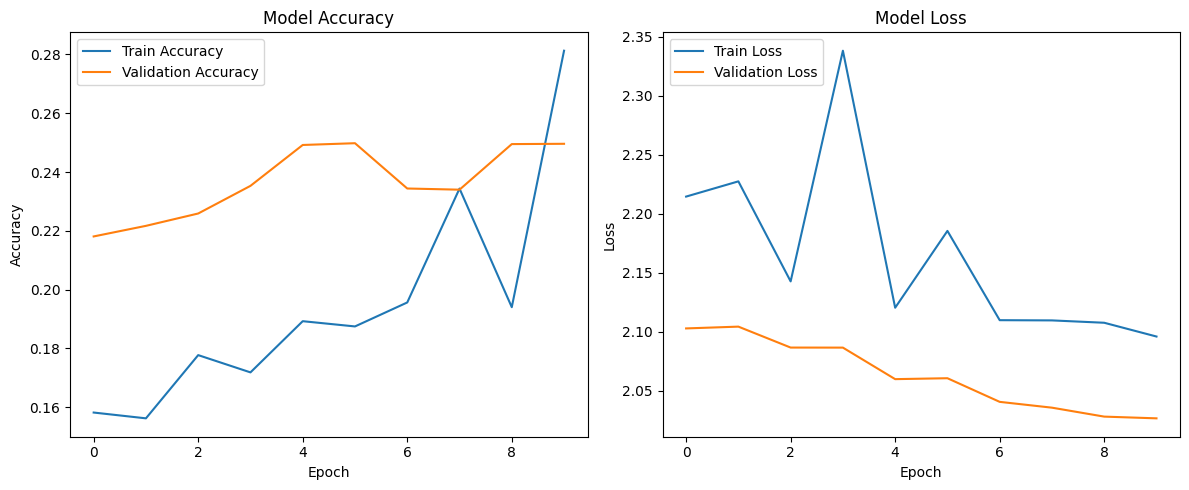

Training complete.


In [8]:
# Fit the model with data augmentation
# Use the data generator to augment the training images
train_datagen = data_augmentation.flow(train_images, train_labels, batch_size=64)

# Train the model for a fixed number of epochs (e.g., 10)
history = model.fit(train_datagen,
                    steps_per_epoch=len(train_images) // 64,  # Total samples / batch size
                    validation_data=(test_images, test_labels),
                    epochs=10)

# Monitor training and validation accuracy and loss
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

print("Training complete.")


How does backpropagation update the weights in each layer, and what
role does the learning rate play in this process?

Backpropagation Process
Forward Pass:

Input data is fed through the network, producing an output and calculating the loss.
Gradient Calculation:

Gradients of the loss with respect to the output are computed and propagated backward through the network using the chain rule. This involves calculating derivatives for each layer.
Weight Update:

Weights are updated using the formula:
w=w-learning_rate*∂Loss/∂𝑤

Here,
w represents the weight, and ∂Loss/∂𝑤 is the gradient.

Role of Learning Rate

1) Update Magnitude:
Determines the size of weight updates. A higher learning rate results in larger updates, while a lower rate leads to smaller, more gradual updates.
2) Training Stability:
A high learning rate can cause instability and divergence, while a low learning rate may lead to slow convergence or getting stuck in local minima.
3) Adaptive Learning:
Optimizers like Adam adjust the learning rate dynamically for better convergence.


Model Evaluation:
o After training, evaluate the performance of your model on the test set.
o Calculate accuracy, precision, recall, F1-score, and the confusion matrix
to understand the model’s classification performance.

In [9]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# 1. Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test Accuracy: {test_accuracy:.4f}')

# 2. Make predictions on the test set
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)  # Get class labels from predictions
true_classes = np.argmax(test_labels, axis=1)  # Get true class labels

# 3. Generate confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:")
print(conf_matrix)

# 4. Generate classification report
class_report = classification_report(true_classes, predicted_classes, target_names=[str(i) for i in range(10)])
print("Classification Report:")
print(class_report)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2523 - loss: 2.0294
Test Accuracy: 0.2496
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Confusion Matrix:
[[ 37  96   0  38  20  22  81  23 311 372]
 [  0 146   0  72  11  76 107  24  61 503]
 [  8  54   0  83 195  65 349  44  70 132]
 [  1  63   0 124  37 255 328  51  13 128]
 [  1  48   0  88 262  35 410  39  25  92]
 [  0  65   0  95  62 345 322  25  20  66]
 [  0  35   0  78 176 102 521  31   3  54]
 [  0  76   0  62 106  73 373  80  13 217]
 [  5  87   0  33   3  66  23   6 303 474]
 [  0  78   0  33  13  31  80  25  62 678]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.04      0.07      1000
           1       0.20      0.15      0.17      1000
           2       0.00      0.00      0.00      1000
           3       0.18      0.12      0.15      1000
           4       0.30      0.26      0.28      1000
           5       0.32      0.34      0.33      1000
           

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


How can you further improve model performance if the accuracy is low?


1. Data Augmentation
Apply transformations like rotations, shifts, and flips to increase training data diversity.
2. Model Architecture
Experiment with deeper architectures, add layers, or use pre-trained models (transfer learning).
3. Regularization
Use dropout to prevent overfitting or apply L1/L2 regularization to control model complexity.
4. Hyperparameter Tuning
Adjust hyperparameters like learning rate, batch size, and epochs using grid or random search.
5. Learning Rate Adjustments
Use learning rate schedules or adaptive optimizers (e.g., Adam) for optimal training.
6. Increase Training Data
Gather more labeled data to improve model generalization.
7. Feature Engineering
Normalize features, remove irrelevant ones, or apply dimensionality reduction.
8. Class Imbalance Handling
Address imbalances by oversampling minority classes, undersampling majority ones, or using weighted losses.
9. Ensemble Methods
Combine predictions from multiple models (e.g., bagging or boosting) for better performance.
10. Fine-Tuning and Validation
Validate on a separate set and use early stopping to prevent overfitting.

Optimization Strategies:
o Discuss optimization strategies such as:

▪ Early stopping to prevent overfitting.
▪ Learning rate scheduling for smoother convergence.
▪ Weight initialization techniques to ensure efficient learning.
1. Early Stopping
Definition: Early stopping is a technique where training is halted when the model's performance on a validation set starts to degrade, despite continued improvement on the training set.
Purpose: This prevents overfitting, where the model learns noise from the training data rather than generalizing well to unseen data.
Implementation: Monitor validation loss or accuracy during training, and stop training if these metrics do not improve for a predetermined number of epochs (patience).

2. Learning Rate Scheduling
Definition: Learning rate scheduling adjusts the learning rate during training, typically decreasing it over time.
Purpose: It allows for larger learning rates initially to speed up convergence and smaller rates later to fine-tune the model.
Common Strategies:
Step Decay: Reduce the learning rate by a factor at specific epochs.
Exponential Decay: Gradually decrease the learning rate using an exponential function.
Reduce on Plateau: Reduce the learning rate when the validation metric stops improving.

3. Weight Initialization Techniques
Definition: Properly initializing weights is crucial for effective learning in neural networks.
Purpose: Good initialization can prevent issues like vanishing or exploding gradients, leading to faster convergence and better final performance.
Common Techniques:
Xavier/Glorot Initialization: Designed for sigmoid/tanh activations; sets weights based on the number of input and output units.
He Initialization: Suitable for ReLU activations; sets weights to draw from a distribution that takes into account the number of input units.
Zero Initialization: Generally avoided, as it can lead to symmetry problems where neurons learn the same features.

Why is weight initialization important, and how does it impact the
convergence of your network?


Weight initialization is a crucial aspect of training neural networks, and it significantly impacts the convergence and overall performance of the model.

Importance of Weight Initialization
Prevents Vanishing and Exploding Gradients:

Proper weight initialization helps mitigate the issues of vanishing or exploding gradients, which can occur during backpropagation. If weights are initialized too small, gradients may become vanishingly small, leading to slow learning. Conversely, if weights are initialized too large, gradients can explode, causing the training process to diverge.
Facilitates Efficient Learning:

Well-initialized weights allow the network to start learning more effectively from the beginning. If weights are initialized poorly, the model may require many more epochs to converge, wasting computational resources.
Breaks Symmetry:

Initializing weights randomly (instead of setting them all to the same value) helps break symmetry between neurons in the same layer. If all weights are the same, neurons will learn the same features during training, which limits the model's capacity to learn diverse representations.
Impact on Convergence
Speed of Convergence:

Good weight initialization can lead to faster convergence because the model starts in a region of the parameter space that is conducive to learning. Poor initialization can cause the model to get stuck in suboptimal regions, requiring more training iterations to escape.
Quality of the Final Model:

The choice of weight initialization can affect the final performance of the model. A well-initialized model is more likely to find a better local minimum, resulting in improved accuracy and generalization on unseen data.
Training Stability:

Proper weight initialization contributes to more stable training dynamics, reducing fluctuations in loss and accuracy during training. This stability can lead to a more predictable training process.

Report:


1. Hyperparameter Values Used:-
Learning Rate: 0.001
Batch Size: 64
Number of Epochs: 50
Model Architecture:
Input Layer: Flatten (32x32x3)
Hidden Layer 1: Dense(512, activation='relu')
Hidden Layer 2: Dense(256, activation='relu')
Output Layer: Dense(10, activation='softmax')

2. Data Preprocessing Steps:-
Normalized pixel values to range between 0 and 1.
Converted class labels into one-hot encoded format.
Applied data augmentation techniques:
Random rotations, width and height shifts, horizontal flips.

3. Model Training and Evaluation:-
Implemented early stopping to prevent overfitting.
Used categorical cross-entropy loss function and Adam optimizer.
Monitored training and validation accuracy during training.

4. Challenges Faced and Solutions:-

4.1 Challenge: Overfitting
Description: The model performed well on the training set but had poor accuracy on the validation set.
Solution:
Implemented dropout layers to reduce overfitting.
Used early stopping to monitor validation performance and stop training when the model started to degrade.

4.2 Challenge: Slow Convergence
Description: The model took a long time to converge, especially in the early epochs.
Solution:
Adjusted the learning rate to 0.001 after experimenting with various values.
Implemented learning rate scheduling to decrease the learning rate over time for smoother convergence.

4.3 Challenge: Class Imbalance
Description: Some classes had significantly fewer samples, leading to biased performance.
Solution:
Applied weighted loss functions to give more importance to underrepresented classes during training.

4.4 Challenge: Hyperparameter Tuning
Description: Finding the optimal hyperparameters was challenging and time-consuming.
Solution:
Used systematic approaches such as grid search and random search to explore different combinations of hyperparameters efficiently.